In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import math




SyntaxError: invalid syntax (1668756401.py, line 14)

In [21]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [22]:
import squarify

In [13]:
df = pd.read_csv('Resources/final_table_with_conditional.csv')
df.head()
df.Date=pd.to_datetime(df.Date)
df.head()

,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks,Price_Status
0,2022-06-01,2022,Cherokee,362500.0,271.0,38.0,148.0,8.0,76.0,1904.0,407510.0,467.0,NaN,5.52,NaN,-0.052164,2.0,down
1,2022-06-01,2022,Craven,313500.0,154.0,36.0,196.0,12.0,48.0,1927.0,396716.0,581.0,NaN,5.52,NaN,0.039801,63.0,up
2,2022-06-01,2022,Catawba,342450.0,207.0,34.0,224.0,0.0,96.0,1923.0,521108.0,508.0,NaN,5.52,NaN,-0.042098,65.0,down
3,2022-06-01,2022,Gaston,330000.0,283.0,30.0,412.0,12.0,200.0,1668.0,377406.0,828.0,NaN,5.52,NaN,0.039370,99.0,up
4,2022-06-01,2022,Warren,275000.0,19.0,68.0,12.0,0.0,4.0,1824.0,419452.0,29.0,NaN,5.52,NaN,NaN,1.0,down


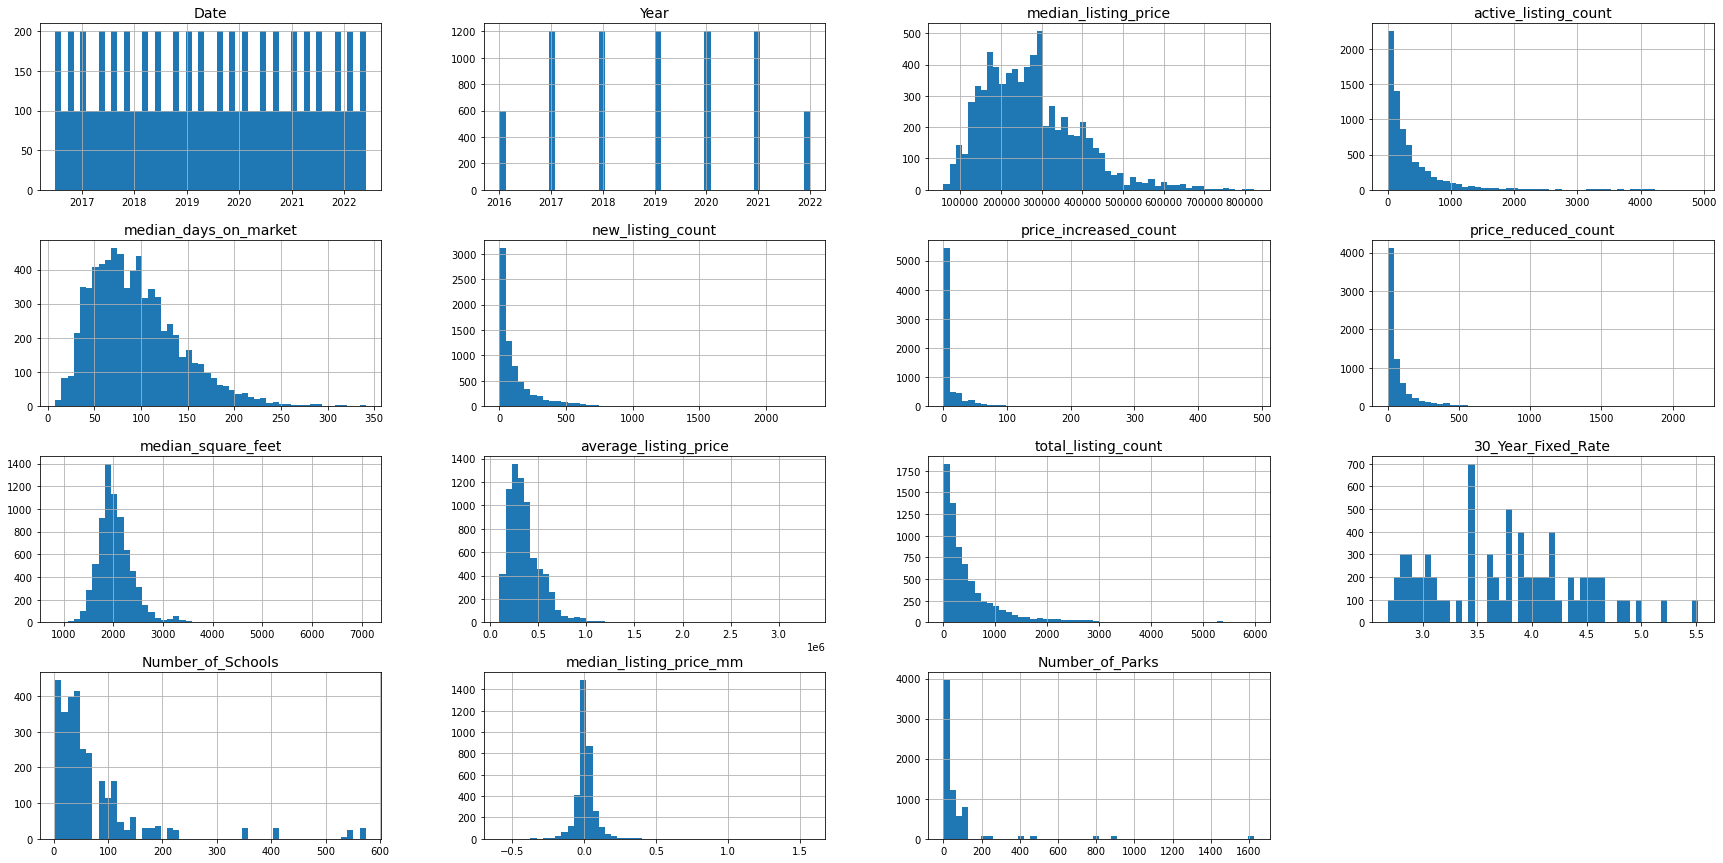

In [14]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(30, 15))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

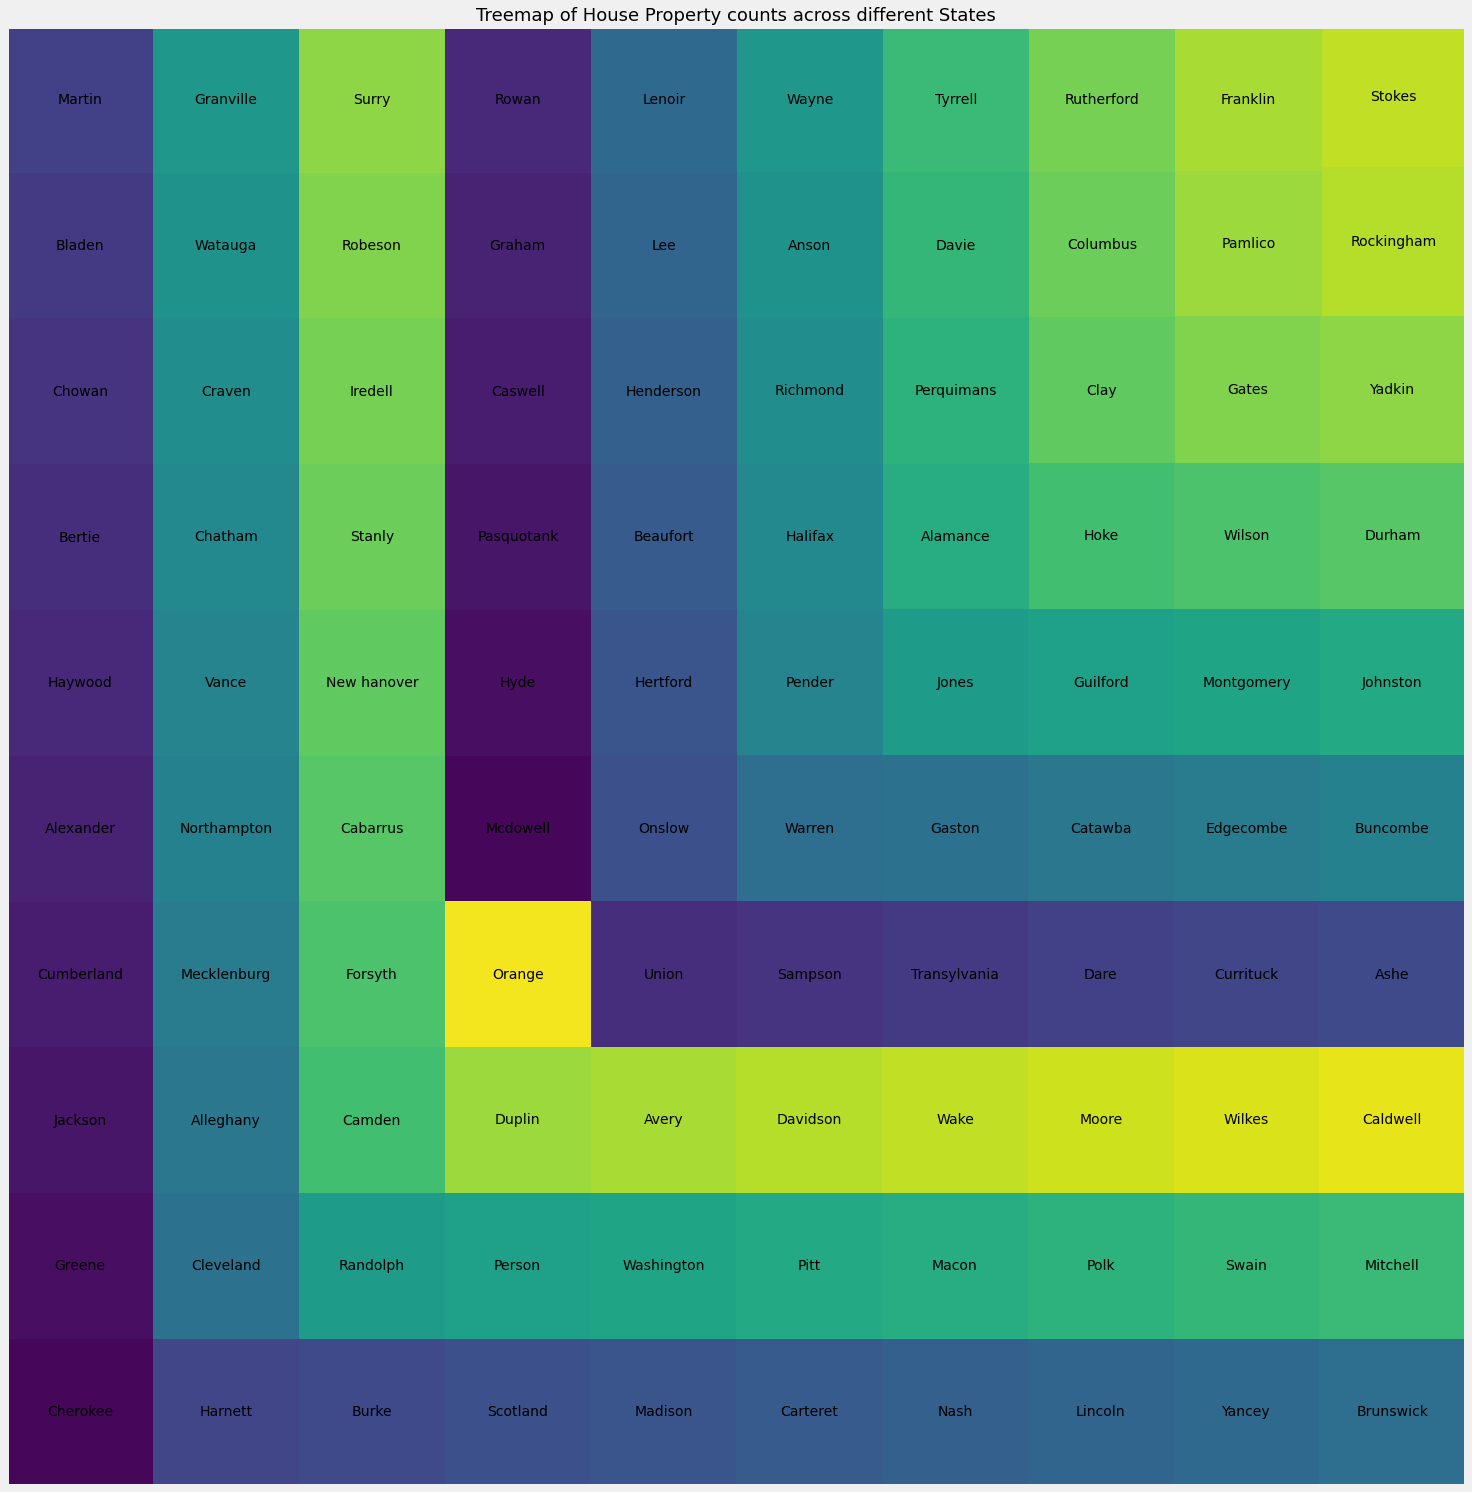

In [24]:
fig = plt.figure(figsize=(25, 21))
county=df.County.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=county['County'].values,label=county.index,
              color=sns.color_palette('viridis', 52), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of House Property counts across different counties", fontsize=18)
plt.show();

In [26]:
years=[2022, 2021, 2020, 2019, 2018, 2017, 2016]
years

[2022, 2021, 2020, 2019, 2018, 2017, 2016]

In [28]:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

NameError: name 'mpl' is not defined

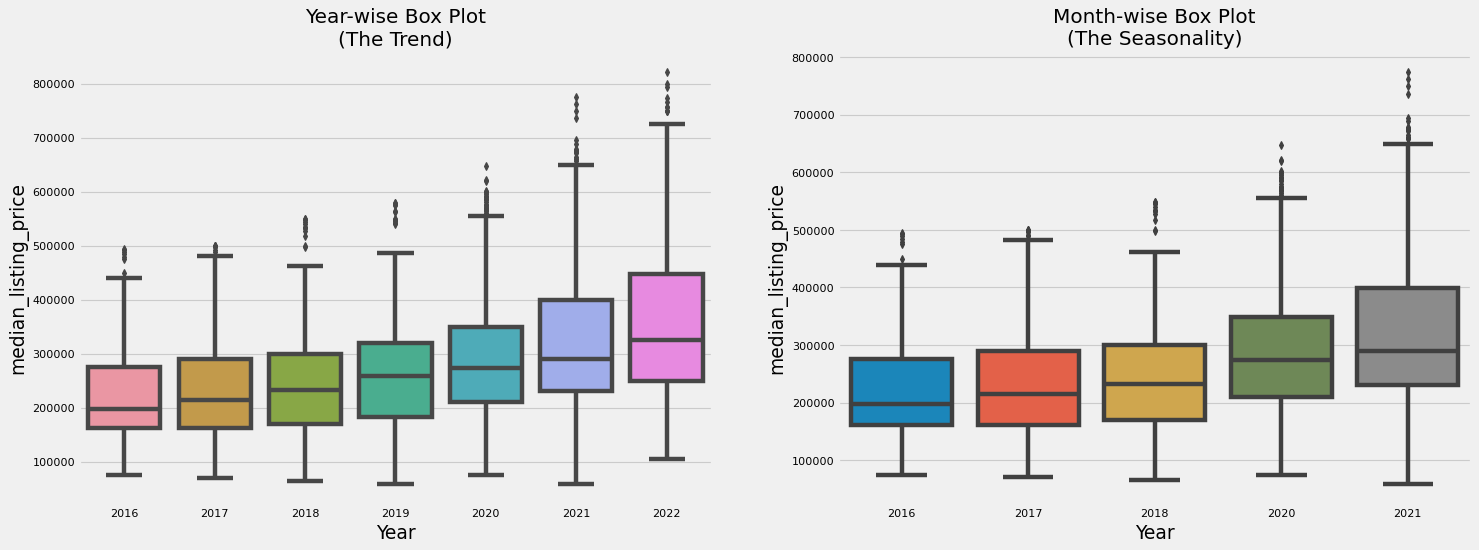

In [37]:

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='median_listing_price', data=df, ax=axes[0])
sns.boxplot(x='Year', y='median_listing_price', data=df.loc[~df.Year.isin([2019, 2022]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

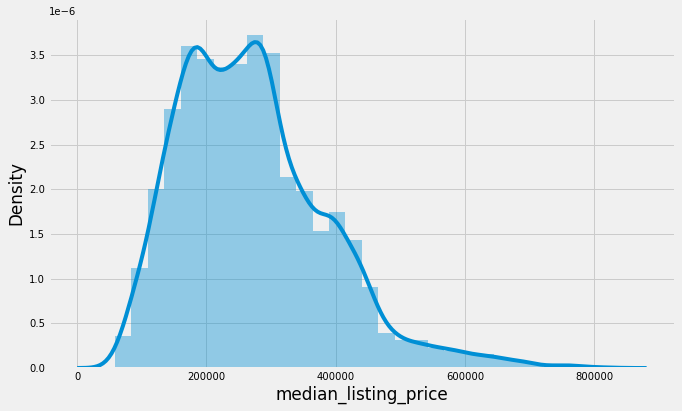

In [43]:
#Plot the distribution of MEDV
plt.figure(figsize=(10, 6))
sns.distplot(df['median_listing_price'],bins=30)

<AxesSubplot:>

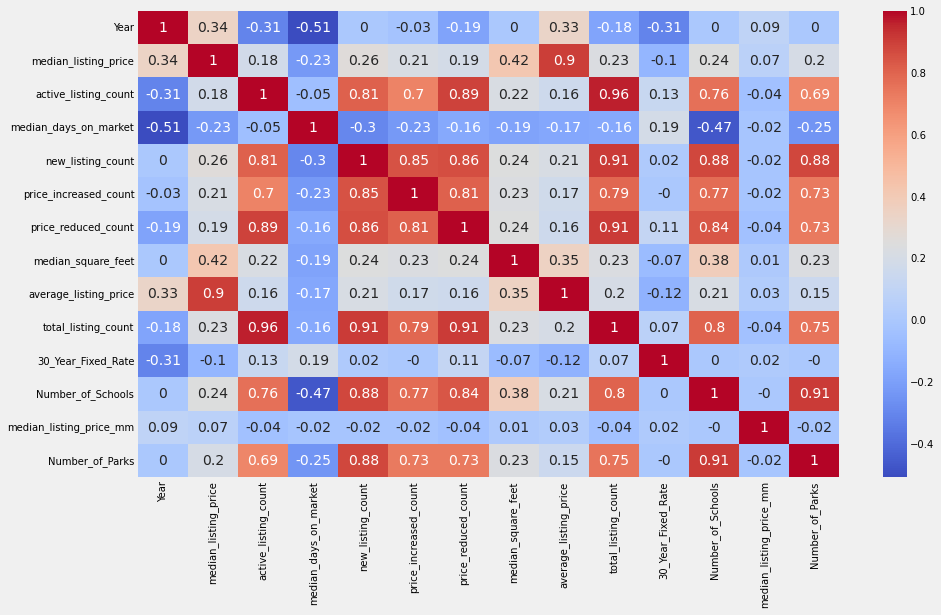

In [44]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

Text(0, 0.5, 'MEDV')

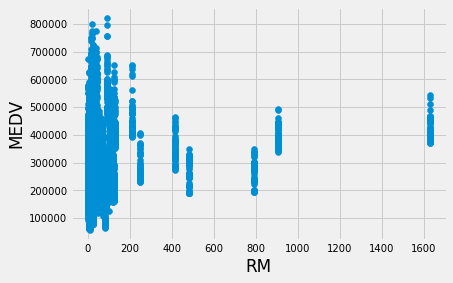

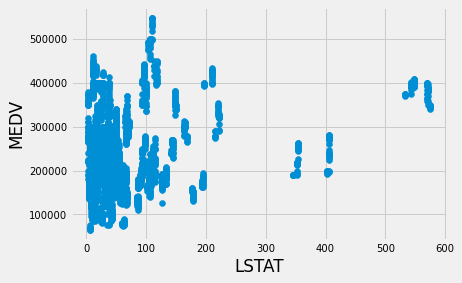

In [48]:
#Scatter plot to observe the correlations between the features that are highly correlated with MEDV
target_var = df['median_listing_price']
plot1 = plt.figure(1)
plt.scatter(df['Number_of_Parks'],target_var)
plt.xlabel('RM')
plt.ylabel('MEDV')
plot2 = plt.figure(2)
plt.scatter(df['Number_of_Schools'],target_var)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [50]:
# A function to split our training data into a training set to train our  model and a validations set, which will be used to validate our model.
def split_vals(a,n):
    return a[:n],a[n:]
# Functions that will help us calculate the RMSE and print the score.
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res =[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)

In [66]:
df.drop(columns=["County"], inplace=True)
df.head()

,Year,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks,Price_Status
0,2022,362500.0,271.0,38.0,148.0,8.0,76.0,1904.0,407510.0,467.0,NaN,5.52,NaN,-0.052164,2.0,down
1,2022,313500.0,154.0,36.0,196.0,12.0,48.0,1927.0,396716.0,581.0,NaN,5.52,NaN,0.039801,63.0,up
2,2022,342450.0,207.0,34.0,224.0,0.0,96.0,1923.0,521108.0,508.0,NaN,5.52,NaN,-0.042098,65.0,down
3,2022,330000.0,283.0,30.0,412.0,12.0,200.0,1668.0,377406.0,828.0,NaN,5.52,NaN,0.039370,99.0,up
4,2022,275000.0,19.0,68.0,12.0,0.0,4.0,1824.0,419452.0,29.0,NaN,5.52,NaN,NaN,1.0,down


In [67]:
n_valid = 100
n_train = len(df)-n_valid
X_train,X_valid = split_vals(df.drop('median_listing_price',axis=1),n_train)
y_train,y_valid = split_vals(df['median_listing_price'],n_train)


In [68]:
y_train

0       362500.0
1       313500.0
2       342450.0
3       330000.0
4       275000.0
          ...   
7091    289900.0
7092    249900.0
7093    234950.0
7094    239900.0
7095    175250.0
Name: median_listing_price, Length: 7096, dtype: float64

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
m=RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

ValueError: could not convert string to float: '1,108.10'

In [70]:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(m,X_train)
importance[:]

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'